In [8]:
%matplotlib inline

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [22]:
valid_size = .2
batch_size = 32

transform = transforms.Compose(
    [
    transforms.RandomResizedCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [23]:
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.shuffle(indices)

from torch.utils.data.sampler import SubsetRandomSampler

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

Let us show some of the training images, for fun.



In [24]:
trainloader = torch.utils.data.DataLoader(
                                          trainset, batch_size=batch_size, 
                                          sampler=train_sampler,
                                          num_workers=2)

validloader = torch.utils.data.DataLoader(
                                          trainset, batch_size=batch_size, 
                                          sampler=valid_sampler,
                                          num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

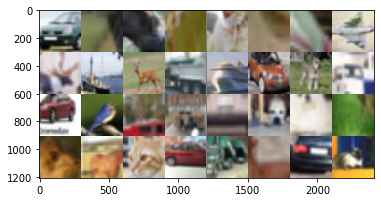

  car plane  deer  bird   cat  bird  frog plane  deer  ship  deer truck  ship   car   dog truck   car  bird truck truck   car   dog   dog  deer  bird horse   cat   car truck  deer   car   cat


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [26]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model_ft = models.inception_v3(pretrained=True, aux_logits=False)

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [28]:
epochs = 10
mini_batch = 1000
mini_batch_1 = 999

train_accuracy, test_accuracy = [], []
train_losses, test_losses = [], []

for epoch in range(epochs):  # loop over the dataset multiple times

    total_train = 0.0
    valid_accuracy = 0.0
    train_acc = 0.0
    
    Iterate_accuracy, Iterate_losses = 0.0, 0.0
    Iterater = 0;
    running_loss = 0.0
    
    for i, (data, target) in enumerate(trainloader):  ##  num Of train Images / batch Size 
        correct_train_iter = 0.0
        total_train_iter = 0.0
        
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_ft(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train_iter += target.size(0) ##32
        correct_train_iter += predicted.eq(target).sum().item() ## 0~32
        
        if i % mini_batch == mini_batch_1:    # print every 2000 mini-batches    
            train_acc_iter = correct_train_iter / total_train_iter
            train_loss_iter = running_loss / mini_batch
            
            print('\n[%d, %5d] loss: %.3f accuracy: %.3f' % (epoch + 1, i + 1, train_loss_iter, train_acc_iter))
            
            Iterate_accuracy += train_acc_iter
            Iterate_losses += train_loss_iter
            Iterater += 1;
            
            running_loss = 0.0
    
    train_accuracy.append(Iterate_accuracy/Iterater)
    train_losses.append(Iterate_losses/Iterater)
    
    net.eval()
    with torch.no_grad():
        step = 0
        valid_loss = 0
        valid_accuracy = 0  
        
        for inputs, labels in validloader: ##  len(validloader) num Of valid Images(16000) / batch Size (16) = 1000

            logps = model_ft.forward(inputs)
            batch_loss = criterion(logps, labels)
            valid_loss += batch_loss.item()
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)

            equals = (top_class == labels.view(*top_class.shape))

            valid_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            step += 1
            
        test_accuracy.append(valid_accuracy/step)
        test_losses.append(valid_loss/step)   
        
    net.train()

    print("Epoch %d / %d .. " % (epoch+1, epochs))
    print(train_accuracy[epoch]) 
    print(train_losses[epoch]) 
    print(test_accuracy[epoch]) 
    print(test_losses[epoch]) 
                             
    #print(f"***Epoch {epoch+1}/{epochs}.. "
            # f"Train loss: {running_loss / len(trainloader):.3f}.. "
            # f"Train accuracy: {correct_train / total_train:.3f}.. "
            # f"Validation loss: {valid_loss/len(validloader):.3f}.. "
            # f"Validation accuracy: {valid_accuracy/len(validloader):.3f}")
                 
print('Finished Training')


[1,  1000] loss: 1.321 accuracy: 0.656


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 200, in send_by

KeyboardInterrupt: 

Before training the model, it is imperative to call model.train(). Likewise, you must call model.eval() before testing the model. This corrects for the differences in dropout, batch normalization during training and testing.

In [ ]:
###draw Result

fig = plt.figure()
fig.set_size_inches(10.5, 7.5)

ax11 = fig.add_subplot(2, 2, 1)
ax11.set_xlim([0, 10])
ax11.set_ylim([0.94, 1.001])
ax11.set_title('Training Accuracy')
ax11.margins(x=0.1, y=0.05)

ax12 = fig.add_subplot(2, 2, 2)
ax12.set_xlim([0, 10])
ax12.set_ylim([0.0, 0.5])
ax12.set_title('Training Loss')
ax12.margins(x=0.1, y=0.5)

ax21 = fig.add_subplot(2, 2, 3)
ax21.set_xlim([0, 10])
ax21.set_ylim([0.97, 1.001])
ax21.set_title('Validation Accuracy')

ax22 = fig.add_subplot(2, 2, 4)
ax22.set_xlim([1, 10])
ax22.set_ylim([0.0, 0.1])
ax22.set_title('Validation Loss')

print(running_loss)

ax11.plot(train_accuracy)
ax12.plot(train_losses)
ax21.plot(test_accuracy)
ax22.plot(test_losses)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Okay, so what next?

How do we run these neural networks on the GPU?

Training on GPU
----------------
Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = data[0].to(device), data[1].to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train a face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_


